# **Training Model using Resnet152V2 CNN Architecture**

In [1]:
# !python --version

# Python 3.7.13

In [2]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
 
# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [3]:
# Import all the necessary libraries

import tensorflow
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob2
from glob2 import glob

In [4]:
# print("Keras version: ", keras.__version__)
# print("Tensorflow version: ", tensorflow.__version__)
# print("Matplotlib version: ", matplotlib.__version__)
# print("Numpy version: ", np.__version__)
# print("glob2 version: ", glob2.__version__)


# Keras version:  2.8.0
# Tensorflow version:  2.8.0
# Matplotlib version:  3.2.2
# Numpy version:  1.21.5
# glob2 version:  (0, 7)

In [5]:
# ResNet152V2 take 224 x 224 size image as an input
# So we have to resize the image that dimention

specific_image_size = [224, 224]

In [6]:
training_image_path = "/content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/dataset/train"

validation_image_path = "/content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/dataset/valid"

In [7]:
# Import the ResNet152V2 and add preprocessing layer to the front of ResNet152V2

resnet152V2_model = tensorflow.keras.applications.ResNet152V2(include_top=False, # we are not using all the layers
                                                              weights='imagenet',
                                                              input_tensor=None,
                                                              input_shape=specific_image_size + [3],
                                                              pooling=None,
                                                              classes=1000,
                                                              classifier_activation='softmax')

234561536/234545216 [==============================] - 2s 0us/step


In [8]:
# Don't train existing weights

for layer in resnet152V2_model.layers:
    layer.trainable = False

In [9]:
# For getting number of ouput classes

folders = glob(pathname="/content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/dataset/train/*")


In [10]:
# Our Layers, you can add more if you want

x = Flatten()(resnet152V2_model.output)

In [11]:
prediction = Dense(units=len(folders), activation='softmax')(x)

# Create a model object

model = Model(inputs=resnet152V2_model.input, outputs=prediction)

In [12]:
# View the structure of the model

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
# tell the model what cost and optimization method to use

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Use the Image data generator to import the images from the dataset

train_datagen = ImageDataGenerator(zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory(directory=training_image_path,
                                                 target_size=(224, 224),
                                                 class_mode='categorical',
                                                 batch_size=32)

Found 3899 images belonging to 2 classes.


In [16]:
training_set.class_indices

{'with_mask': 0, 'without_mask': 1}

In [17]:
test_set = test_datagen.flow_from_directory(directory=validation_image_path,
                                                 target_size=(224, 224),
                                                 class_mode='categorical',
                                                 batch_size=32)

Found 806 images belonging to 2 classes.


In [18]:
test_set.class_indices

{'with_mask': 0, 'without_mask': 1}

In [22]:
# Save the best model using val_accuracy

model_path = "/content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/Using Transfer Learning/model/resnet152v2.h5"

checkpoint = ModelCheckpoint(filepath=model_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

callbacks_list = [checkpoint]


In [23]:
# fit the model
# run the cell. It will take some time to execute

history = model.fit(x=training_set,
                    epochs=10,
                    callbacks=callbacks_list,
                    validation_data=test_set,
                    steps_per_epoch=(len(training_set)),
                    validation_steps=len(test_set))

Epoch 1/10
 17/122 [===>..........................] - ETA: 1:13 - loss: 0.0107 - accuracy: 0.9982

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


122/122 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 0.9985
Epoch 1: val_accuracy improved from -inf to 0.99752, saving model to /content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/Using Transfer Learning/model/resnet152v2.h5
122/122 [==============================] - 104s 852ms/step - loss: 0.0636 - accuracy: 0.9985 - val_loss: 0.2338 - val_accuracy: 0.9975
Epoch 2/10
122/122 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9992
Epoch 2: val_accuracy did not improve from 0.99752
122/122 [==============================] - 100s 817ms/step - loss: 0.0305 - accuracy: 0.9992 - val_loss: 0.3629 - val_accuracy: 0.9975
Epoch 3/10
122/122 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
Epoch 3: val_accuracy did not improve from 0.99752
122/122 [==============================] - 100s 817ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.1961 - val_accuracy: 0.9975
Epoch 4/10
122/122 [============

**loss: 0.0959 - accuracy: 0.9990 - val_loss: 0.0790 - val_accuracy: 0.9988**

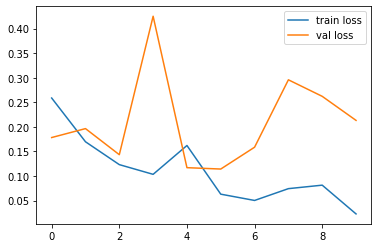

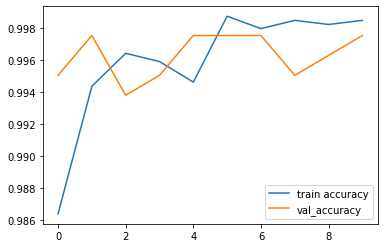

In [21]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')